/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading model across multiple GPUs...


/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


Model loaded successfully.
Extracting hidden states for non_infringement texts...


Processing data batches: 100%|██████████| 148/148 [18:07<00:00,  7.35s/it]


Extracting reference embeddings for non_infringement texts...


Processing references: 100%|██████████| 148/148 [00:01<00:00, 122.12it/s]


Extracting hidden states for infringement texts...


Processing data batches: 100%|██████████| 42/42 [05:14<00:00,  7.48s/it]


Extracting reference embeddings for infringement texts...


Processing references: 100%|██████████| 42/42 [00:00<00:00, 112.77it/s]


Data successfully split into training and test sets.


Training Epochs:   4%|▍         | 10/250 [00:00<00:03, 73.68it/s]

Epoch 10/250, Loss: 5.9786
Test Accuracy: 72.37%, F1-score: 0.8397
New best model saved with Accuracy 72.37%.
New best model saved with F1-score 0.8397.
Epoch 20/250, Loss: 4.7784


Training Epochs:  12%|█▏        | 30/250 [00:00<00:01, 136.68it/s]

Test Accuracy: 33.55%, F1-score: 0.3129
Epoch 30/250, Loss: 1.7820
Test Accuracy: 73.68%, F1-score: 0.8462
New best model saved with Accuracy 73.68%.
New best model saved with F1-score 0.8462.
Epoch 40/250, Loss: 0.6242
Test Accuracy: 34.21%, F1-score: 0.3243


Training Epochs:  20%|██        | 51/250 [00:00<00:01, 167.30it/s]

Epoch 50/250, Loss: 0.4609
Test Accuracy: 74.34%, F1-score: 0.8506
New best model saved with Accuracy 74.34%.
New best model saved with F1-score 0.8506.
Epoch 60/250, Loss: 0.4160
Test Accuracy: 74.34%, F1-score: 0.8506


Training Epochs:  41%|████      | 103/250 [00:00<00:00, 298.14it/s]

Epoch 70/250, Loss: 0.3974
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 80/250, Loss: 0.3889
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 90/250, Loss: 0.3860
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 100/250, Loss: 0.3839
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 110/250, Loss: 0.3819
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 120/250, Loss: 0.3799
Test Accuracy: 74.34%, F1-score: 0.8506


Training Epochs:  62%|██████▏   | 154/250 [00:00<00:00, 369.89it/s]

Epoch 130/250, Loss: 0.3778
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 140/250, Loss: 0.3751
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 150/250, Loss: 0.3712
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 160/250, Loss: 0.3657
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 170/250, Loss: 0.3577


Training Epochs:  82%|████████▏ | 205/250 [00:00<00:00, 414.98it/s]

Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 180/250, Loss: 0.3471
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 190/250, Loss: 0.3385
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 200/250, Loss: 0.3446
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 210/250, Loss: 0.3511
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 220/250, Loss: 0.3397
Test Accuracy: 74.34%, F1-score: 0.8506
Epoch 230/250, Loss: 0.3300
Test Accuracy: 75.00%, F1-score: 0.8538


Training Epochs: 100%|██████████| 250/250 [00:00<00:00, 284.28it/s]

New best model saved with Accuracy 75.00%.
New best model saved with F1-score 0.8538.
Epoch 240/250, Loss: 0.3210
Test Accuracy: 75.00%, F1-score: 0.8538
Epoch 250/250, Loss: 0.3320
Test Accuracy: 61.84%, F1-score: 0.7456


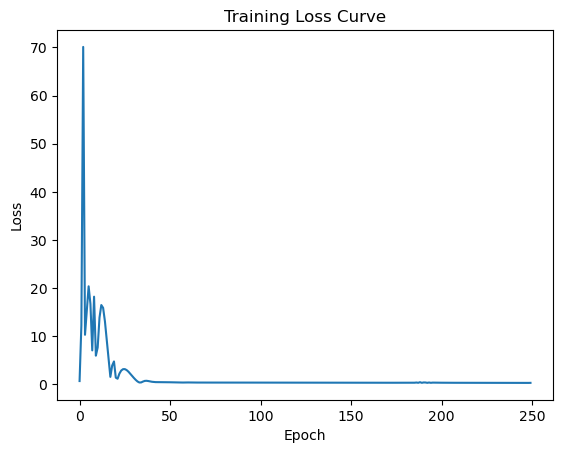

Training complete. Best Accuracy: 75.00%, Best F1-score: 0.8538


: 

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel
import json
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3,4"

# Variables
model_name = '/raid/data/guangwei/huggingface/hub/models--meta-llama--Llama-3.1-70B/snapshots/349b2ddb53ce8f2849a6c168a81980ab25258dac/'
non_infringement_file = '/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/literal.non_infringement.json'
infringement_file = '/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/literal.infringement.json'
checkpoint_file = '/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/models/1.pth'

# Define CustomMLP for internal states train
class CustomMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CustomMLP, self).__init__()
        self.down = nn.Linear(input_dim, hidden_dim)
        self.gate = nn.Linear(input_dim, hidden_dim)
        self.up = nn.Linear(hidden_dim, 1)
        self.activation = nn.SiLU()

    def forward(self, x):
        down_output = self.down(x)
        gate_output = self.gate(x)
        gated_output = down_output * self.activation(gate_output)
        return self.up(gated_output)


# 提取隐藏状态
def extract_hidden_states(texts, model, tokenizer, batch_size=4):
    hidden_states = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing data batches"):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: val.to("cuda") for key, val in inputs.items()}  # 移动到 GPU
        with torch.no_grad():
            outputs = model(**inputs)
        last_layer_hidden_states = outputs.hidden_states[-1]
        last_token_hidden_states = last_layer_hidden_states[:, -1, :].cpu().numpy()  # 最后一个token的隐藏状态
        hidden_states.append(last_token_hidden_states)
    return np.vstack(hidden_states)

def extract_reference_embeddings(references, model, tokenizer, batch_size=4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    embeddings = []
    for i in tqdm(range(0, len(references), batch_size), desc="Processing references"):
        batch_references = references[i:i + batch_size]
        inputs = tokenizer(batch_references, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: val.to(device) for key, val in inputs.items()}  # Move inputs to GPU
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the pooler output (for sequence classification tasks, typically the [CLS] token)
        embeddings.append(outputs.pooler_output.cpu().numpy())
    return np.vstack(embeddings)

# Load data for infringement & non-infringement
def load_data(non_infringement_file, infringement_file):
    with open(non_infringement_file, 'r', encoding='utf-8') as file:
        non_infringement_json_data = json.load(file)

    non_infringement_outputs = [entry['input'] for entry in non_infringement_json_data]
    non_infringement_references = [entry['reference'] for entry in non_infringement_json_data]
    y_non_infringement = [1] * len(non_infringement_outputs)

    with open(infringement_file, 'r', encoding='utf-8') as file:
        infringement_json_data = json.load(file)

    infringement_outputs = [entry['input'] for entry in infringement_json_data]
    infringement_references = [entry['reference'] for entry in infringement_json_data]
    y_infringement = [0] * len(infringement_outputs)

    return non_infringement_outputs, non_infringement_references, y_non_infringement, infringement_outputs, infringement_references, y_infringement

# 加载模型
def load_large_model(model_name):
    """加载超大模型并在多卡上分布"""
    print("Loading model across multiple GPUs...")
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="balanced",  # 自动平衡分布到多张 GPU
        offload_folder="offload",  # 如果显存不足，部分权重会被卸载到磁盘
        offload_state_dict=True,
        output_hidden_states=True
    )
    print("Model loaded successfully.")
    return model


def train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim, epochs=250, lr=0.001, checkpoint_path=checkpoint_file):
    custom_mlp = CustomMLP(input_dim, hidden_dim).to("cuda")
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(custom_mlp.parameters(), lr=lr)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to("cuda")
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to("cuda")

    best_f1 = -float('inf')  # 初始化最佳 F1 分数
    best_accuracy = -float('inf')  # 初始化最佳准确率
    losses = []

    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        custom_mlp.train()
        optimizer.zero_grad()
        outputs = custom_mlp(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
            # 测试模型
            custom_mlp.eval()
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to("cuda")
            with torch.no_grad():
                y_pred_logits = custom_mlp(X_test_tensor)
                y_pred = (torch.sigmoid(y_pred_logits) > 0.5).float().cpu().numpy()

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(f"Test Accuracy: {accuracy * 100:.2f}%, F1-score: {f1:.4f}")
            
            # 更新最佳准确率和F1分数
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                torch.save(custom_mlp.state_dict(), checkpoint_path)  # 保存模型
                print(f"New best model saved with Accuracy {best_accuracy * 100:.2f}%.")

            if f1 > best_f1:
                best_f1 = f1
                torch.save(custom_mlp.state_dict(), checkpoint_path)  # 保存模型
                print(f"New best model saved with F1-score {best_f1:.4f}.")

    # 绘制训练损失曲线
    plt.plot(losses)
    plt.title("Training Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    return custom_mlp, best_accuracy, best_f1


# 加载数据
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
model = load_large_model(model_name)
tokenizer.pad_token = tokenizer.eos_token
bert_tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
bert_model = AutoModel.from_pretrained('google-bert/bert-base-uncased')
bert_tokenizer.pad_token = tokenizer.eos_token

non_infringement_outputs, non_infringement_references, y_non_infringement, infringement_outputs, infringement_references, y_infringement = load_data(
    non_infringement_file, infringement_file
)

y_non_infringement = np.array(y_non_infringement)
y_infringement = np.array(y_infringement)

# Extract hidden states and reference embeddings
print("Extracting hidden states for non_infringement texts...")
X_non_infringement = extract_hidden_states(non_infringement_outputs, model, tokenizer)
print("Extracting reference embeddings for non_infringement texts...")
reference_embeddings_non_infringement = extract_reference_embeddings(non_infringement_references, bert_model, bert_tokenizer)
X_non_infringement_combined = np.hstack([X_non_infringement, reference_embeddings_non_infringement])

print("Extracting hidden states for infringement texts...")
X_infringement = extract_hidden_states(infringement_outputs, model, tokenizer)
print("Extracting reference embeddings for infringement texts...")
reference_embeddings_infringement = extract_reference_embeddings(infringement_references, bert_model, bert_tokenizer)
X_infringement_combined = np.hstack([X_infringement, reference_embeddings_infringement])

# Split data into train and test sets
split_index_non_infringement = int(0.8 * len(X_non_infringement_combined))
X_non_infringement_train = X_non_infringement_combined[:split_index_non_infringement]
X_non_infringement_test = X_non_infringement_combined[split_index_non_infringement:]
y_non_infringement_train = y_non_infringement[:split_index_non_infringement]
y_non_infringement_test = y_non_infringement[split_index_non_infringement:]

split_index_infringement = int(0.8 * len(X_infringement_combined))
X_infringement_train = X_infringement_combined[:split_index_infringement]
X_infringement_test = X_infringement_combined[split_index_infringement:]
y_infringement_train = y_infringement[:split_index_infringement]
y_infringement_test = y_infringement[split_index_infringement:]

X_train = np.vstack((X_non_infringement_train, X_infringement_train))
X_test = np.vstack((X_non_infringement_test, X_infringement_test))
y_train = np.concatenate((y_non_infringement_train, y_infringement_train))
y_test = np.concatenate((y_non_infringement_test, y_infringement_test))

print("Data successfully split into training and test sets.")

# 定义参数并训练
input_dim = X_train.shape[1]
hidden_dim = 256

trained_model, best_accuracy, best_f1 = train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim)
print(f"Training complete. Best Accuracy: {best_accuracy * 100:.2f}%, Best F1-score: {best_f1:.4f}")